<a href="https://colab.research.google.com/github/vicksCoghi/data_Manual/blob/main/Support_Vector_Machines_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.svm import SVC #SVC para classificação
import matplotlib.pyplot as plt

**- C = Vai ser definido como uma "tolerância" ao erro, podendo ser maior no inicio e menor conforme desenvolve-se o projeto.**

**- Kernel = é uma função responsável por transformar os dados de entrada no formato necessário, como dados inseparaveis  em separaveis.**

**- train_test_split = vai separar e definir os X's e Y's de treino e teste.**

**- O fit coloca os dados do treino dentro do algoritmo.**

**- Standard Scaler = vai normalizar as variáveis preditoras, vai padronizar os dados.**

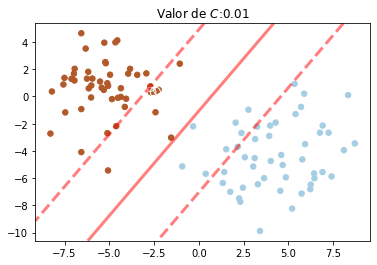

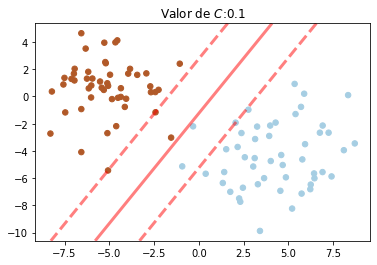

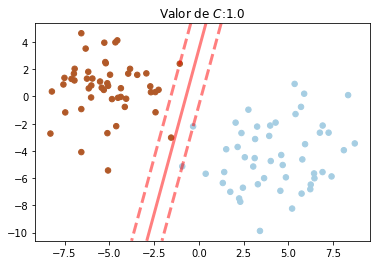

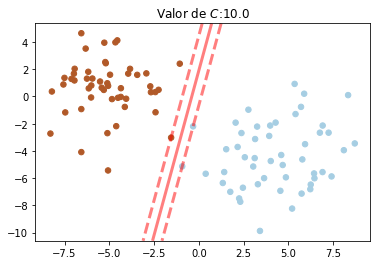

In [10]:
#Criação de 100 pontos separáveis

X, y = make_blobs(n_samples=100, centers=2,
                  cluster_std=2, random_state=123)

# Implementando SVM Linear para níveis diferentes de C
for C in [1e-2, 1e-1,1e0,1e1]: #a tolerância ao erro de C vai diminuindo
  clf = SVC(kernel='linear',C=C)
  clf.fit(X,y)

  plt.figure()
  plt.clf()
  plt.grid(False)
  plt.scatter(X[:,0],X[:,1],c=y, s=30,cmap=plt.cm.Paired)

  # plot função de decisão
  ax = plt.gca()
  xlim = ax.get_xlim()
  ylim = ax.get_ylim()

  # criando grid para avaliar o modelo
  xx = np.linspace(xlim[0],xlim[1], 30)
  yy = np.linspace(ylim[0],ylim[1], 30)
  YY, XX = np.meshgrid(yy,xx)
  xy = np.vstack([XX.ravel(), YY.ravel()]).T
  Z = clf.decision_function(xy).reshape(XX.shape)

  # limites e margens de decisão de plotagem 
  ax.contour(XX,YY,Z, colors = 'red',levels=[-1,0,1], alpha=0.5,
             linestyles=['--','-','--'],linewidths=3)
  #plot support vectors
  ax.scatter(clf.support_vectors_[:,0], clf.support_vectors_[:,1],s=100,
             linewidth=1,facecolors='none',edgecolors='w')
  plt.title(f"Valor de $C$:{C}")

plt.show()
